In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def runge_kutta(time_steps, y0, system, params):
    ys = [y0]
    for t in range(len(time_steps)-1):
        dt = time_steps[t+1]-time_steps[t]
        t0 = time_steps[t]
        t1 = time_steps[t+1]
        k1 = system(t0, y0, params)
        k2 = system(t0 + dt/2, y0 + dt / 2 * k1, params)
        k3 = system(t0 + dt/2, y0 + dt / 2 * k2, params)
        k4 = system(t1, y0 + dt * k3, params)
        y0  = y0 + dt / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        ys.append(y0)
    return np.array(ys)

In [4]:
def reg_system(t, xy, params):
    x, y = xy
    dx = 3*x + y
    dy = x - y
    return np.array([dx,dy])

In [11]:
tsl = np.linspace(0, -0.5, 201)
tsr = np.linspace(0,  0.5, 201)

xy0 = np.random.uniform(-10,10,2)

sol_l = runge_kutta(tsl, xy0, reg_system, []).T
sol_r = runge_kutta(tsr, xy0, reg_system, []).T

x = np.concatenate([sol_l[0][::-1], sol_r[0]])
y = np.concatenate([sol_l[1][::-1], sol_r[1]])

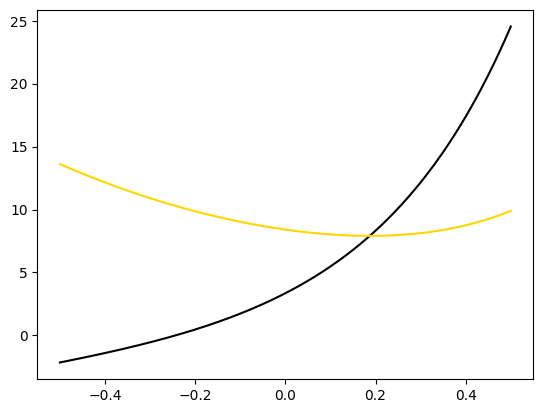

In [12]:
plt.plot(np.concatenate([tsl[::-1], tsr]), x, c='black')
plt.plot(np.concatenate([tsl[::-1], tsr]), y, c='gold')

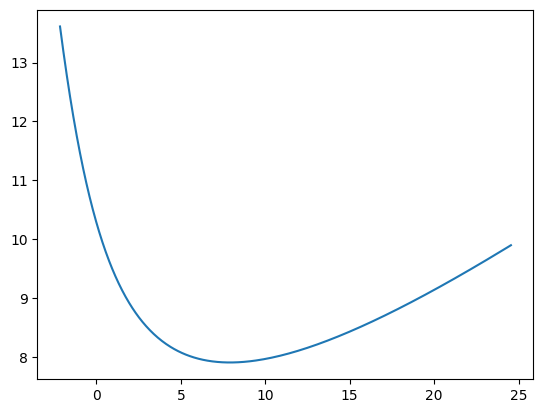

In [13]:
plt.plot(x, y)

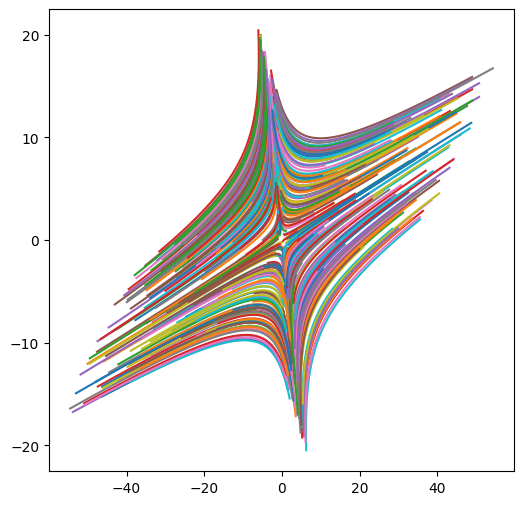

In [14]:
fig, ax = plt.subplots(1,1,figsize=(6,6))

for i in range(400):

    xy0 = np.random.uniform(-10,10,2)

    sol_l = runge_kutta(tsl, xy0, reg_system, []).T
    sol_r = runge_kutta(tsr, xy0, reg_system, []).T

    x = np.concatenate([sol_l[0][::-1], sol_r[0]])
    y = np.concatenate([sol_l[1][::-1], sol_r[1]])

    ax.plot(x,y)

plt.show()

In [15]:
def lorentz_ode(t, xyz, params):
    x, y, z = xyz
    σ = params['σ']
    ρ = params['ρ']
    β = params['β']
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return np.array([dx, dy, dz])

In [21]:
np.random.seed(666)
ts = np.linspace(0, 100, 20001)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.random.uniform(0,5,3)
xyz1 = np.random.uniform(0,5,3)
xyz2 = np.random.uniform(0,5,3)

xyz0, xyz1, xyz2

(array([3.50218561, 4.22093321, 3.38257168]),
 array([3.63929029, 4.75728979, 0.06351599]),
 array([2.06793849, 0.24406397, 0.49964281]))

In [22]:
x0, y0, z0 = runge_kutta(ts, xyz0, lorentz_ode, params).T
x1, y1, z1 = runge_kutta(ts, xyz1, lorentz_ode, params).T
x2, y2, z2 = runge_kutta(ts, xyz2, lorentz_ode, params).T

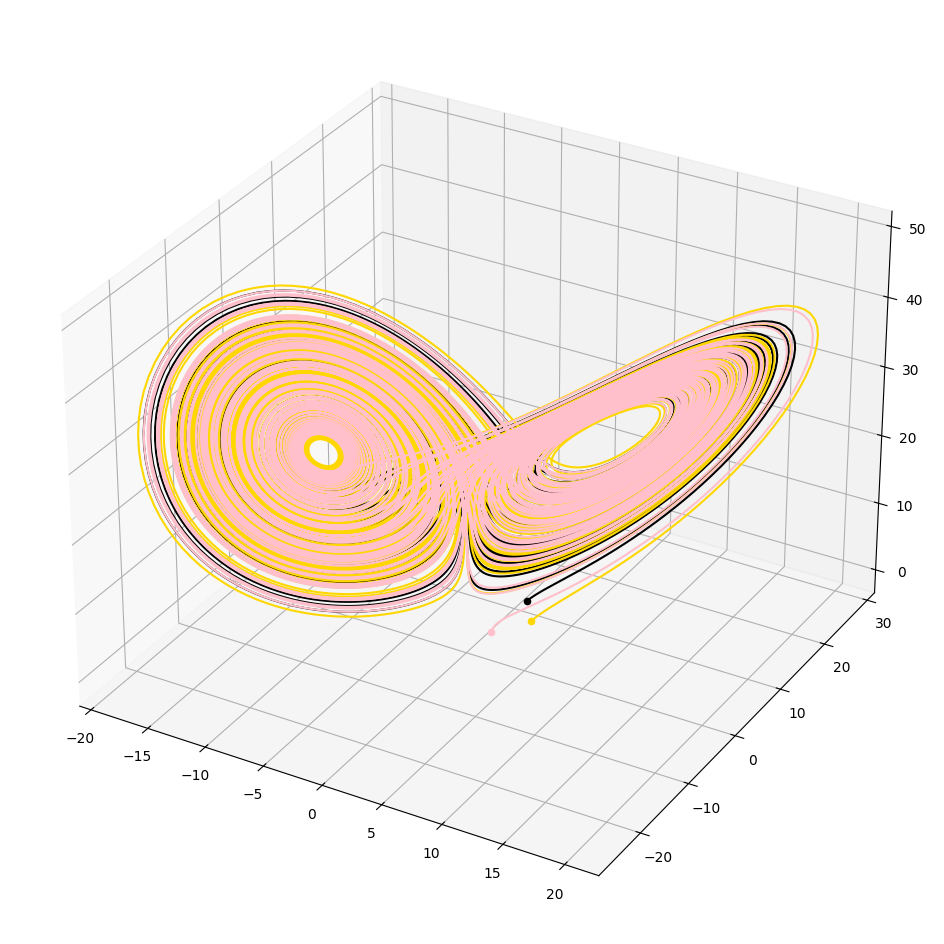

In [23]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12,12))

ax.plot(x0, y0, z0, color='black')
ax.plot(x1, y1, z1, color='gold')
ax.plot(x2, y2, z2, color='pink')


ax.scatter(*xyz0, color='black')
ax.scatter(*xyz1, color='gold')
ax.scatter(*xyz2, color='pink')


plt.show()

In [26]:
tsl = np.linspace(0, -0.5, 201)
tsr = np.linspace(0,  0.5, 201)

xy0 = [-1., 1]

sol_l = runge_kutta(tsl, xy0, reg_system, []).T
sol_r = runge_kutta(tsr, xy0, reg_system, []).T

x1 = np.concatenate([sol_l[0][::-1], sol_r[0]])
y1 = np.concatenate([sol_l[1][::-1], sol_r[1]])

xy0 = [-1.01, 1.01]

sol_l = runge_kutta(tsl, xy0, reg_system, []).T
sol_r = runge_kutta(tsr, xy0, reg_system, []).T

x2 = np.concatenate([sol_l[0][::-1], sol_r[0]])
y2 = np.concatenate([sol_l[1][::-1], sol_r[1]])

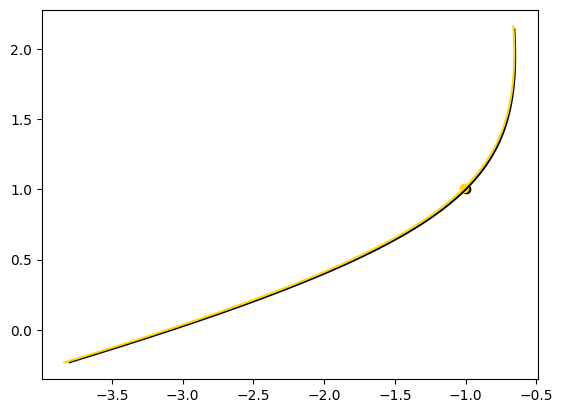

In [27]:
plt.plot(x1, y1, c='black')
plt.plot(x2, y2, c='gold')

plt.scatter(-1., 1, c='black')
plt.scatter(-1.01, 1.01, c='gold')

plt.show()

In [33]:
np.random.seed(666)
ts = np.linspace(0, 5., 10001)
params = {'σ' : 10., 'ρ' : 28., 'β' : 8/3}
xyz0 = np.random.uniform(0,5,3)
xyz1 = np.random.uniform(0,5,3)
xyz0, xyz1

(array([3.50218561, 4.22093321, 3.38257168]),
 array([3.63929029, 4.75728979, 0.06351599]))

In [34]:
x0, y0, z0 = runge_kutta(ts, xyz0, lorentz_ode, params).T
x1, y1, z1 = runge_kutta(ts, xyz1, lorentz_ode, params).T

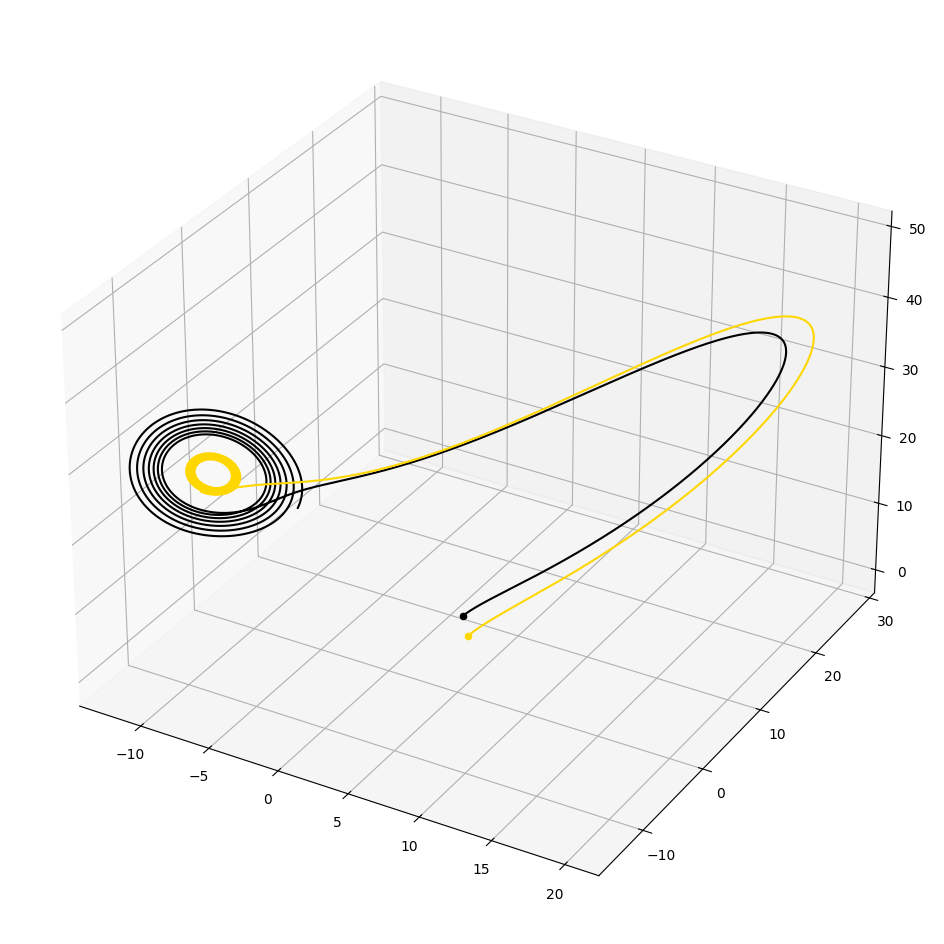

In [35]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(12,12))

ax.plot(x0, y0, z0, color='black')
ax.plot(x1, y1, z1, color='gold')

ax.scatter(*xyz0, color='black')
ax.scatter(*xyz1, color='gold')

plt.show()

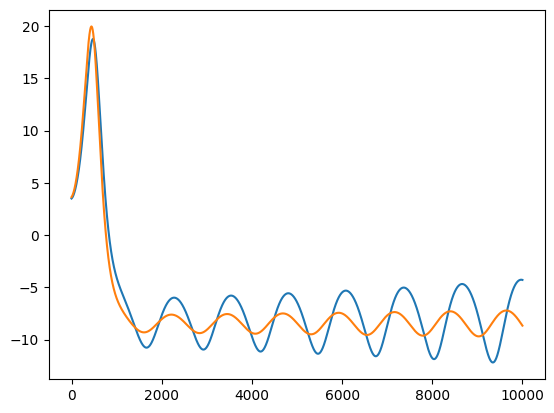

In [36]:
plt.plot(x0)
plt.plot(x1)